# Loading libraries

In [1]:
#upgrade tensorflow and keras
!pip install -U tensorflow
!pip install -U keras

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
     |████████████████████████████████| 3.8MB 33.4MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

     |████████████████████████████████| 378kB 4.7MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [2]:
#check Tensor flow and Keras current version
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.1.0
2.3.1


Using TensorFlow backend.


In [0]:
#loading libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import time
import cv2
import seaborn as sns

In [4]:
#computing runtime
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00011777877807617188 seconds ---


# Reading the data

In [5]:
drive.mount('/content/gdrive')
root_path1 = 'gdrive/My Drive/DL human pose '  #root path for current Notebook and npy images file
#root_path = '/content/gdrive/My Drive/Colab Notebooks/DL_Project/Dataset/resized_20'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
os.chdir(root_path1) #change current working directory
print(os.getcwd())

/content/gdrive/My Drive/DL human pose 


In [7]:
#code used to transform image names to list 
'''
os.chdir(root_path)
img_names = list(os.listdir()) #getting all images names in one list
img_names_sorted = list(np.sort(img_names)) #sorted list ascending for image names
len(img_names_sorted)
'''

'\nos.chdir(root_path)\nimg_names = list(os.listdir()) #getting all images names in one list\nimg_names_sorted = list(np.sort(img_names)) #sorted list ascending for image names\nlen(img_names_sorted)\n'

In [8]:
#code used to save image names sorted list as .npy file to load it instead of performing the list operation in previus cell everytime we run the code
''' 
os.chdir(root_path1)
np.save('image_names.npy', img_names_sorted)
'''

" \nos.chdir(root_path1)\nnp.save('image_names.npy', img_names_sorted)\n"

The activity and image names dataframe is accessible through below link  
https://drive.google.com/open?id=1-5n6HIzH8Et6-5STeJ2kjuuNSJpLthqe

In [0]:
label_df = pd.read_csv('names_label.csv')

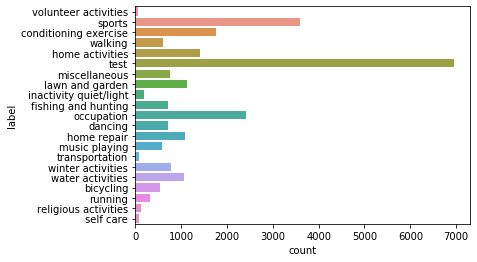

In [10]:
sns.countplot(y = label_df['label'])

In [11]:
print(label_df['label'].value_counts())

test                      6954
sports                    3593
occupation                2412
conditioning exercise     1755
home activities           1416
lawn and garden           1130
home repair               1090
water activities          1066
winter activities          778
miscellaneous              755
fishing and hunting        725
dancing                    722
walking                    608
music playing              583
bicycling                  533
running                    316
inactivity quiet/light     189
religious activities       124
transportation              93
self care                   90
volunteer activities        55
Name: label, dtype: int64


We can see there is 20 classes in the dataset and most dominant class is sports with count of (3590), this needs to take care during data split to training and validation

## The dataset images after resized to 224, 224 is accessible through below link  
https://drive.google.com/open?id=1-5aEFQIa6NDsbMmfBauhEgxS-ipQPEGN



In [0]:
loaded_resized_images = np.load('Dataset_Images_Resized_to_224.npy')    # load the resized images (all dataset)


In [13]:
loaded_resized_images.shape

(24984, 224, 224, 3)

#Data Processing

In [14]:
# Getting the indices of test labels in separate list:

label_counter = 0
label_indices = []


col_labels_list = label_df['label'].tolist()        # convert the label_df['label'] to list

# for loop to capture the indices of test images within the whole dataset:
for j in range(len(col_labels_list)):
    if col_labels_list[j] == 'test':
        label_indices.append(label_counter)
    
    label_counter += 1

print(len(label_indices))
print(label_indices[0:10])
print(label_indices[-1])


6954
[7, 9, 12, 16, 19, 21, 22, 24, 26, 27]
24984


In [15]:
# Create separated lists for train-valid and test:

train_valid_list = []
test_list = []

#train_valid_array = np.empty(shape=(224,224,3))
#test_array = np.empty(shape=(224,224,3))

# Create list of test images based on the test indices:
for k in range(len(label_indices) - 1):
    test_list.append(loaded_resized_images[label_indices[k]])

print(len(test_list))
print(test_list[0].shape)
#test_list[589]

6953
(224, 224, 3)


In [16]:
# Create list of train-valid images based on their indices:

train_valid_labels = []

# for loop to capture create the list of train-valid images:
for m in range(len(loaded_resized_images)):

    if m not in label_indices:

        train_valid_list.append(loaded_resized_images[m])
        train_valid_labels.append(col_labels_list[m])

print(len(train_valid_list))
print(train_valid_list[0].shape)

print(len(train_valid_labels))
print(train_valid_labels[0:7])

18031
(224, 224, 3)
18031
['volunteer activities', 'sports', 'conditioning exercise', 'walking', 'home activities', 'sports', 'sports']


In [17]:
# Convert to arrays:

train_valid_array = np.asarray(train_valid_list)
train_valid_labels_array= np.asarray(train_valid_labels)

test_array = np.asarray(test_list)

print(train_valid_array.shape)
print(train_valid_labels_array.shape)
print(test_array.shape)

(18031, 224, 224, 3)
(18031,)
(6953, 224, 224, 3)


In [18]:
# Transform the string labels to integers to be used for multi-class classification:

from sklearn.preprocessing import LabelEncoder

# prepare targets:

def prepare_targets(y_train):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	return y_train_enc

train_valid_labels_array_lenc = prepare_targets(train_valid_labels_array)

print(train_valid_labels_array_lenc)
print(type(train_valid_labels_array_lenc))
print(train_valid_labels_array_lenc.shape)

[16 14  1 ... 10 14 14]
<class 'numpy.ndarray'>
(18031,)


In [0]:
n_classes=len(set(train_valid_labels_array))

In [0]:
from keras import utils
from keras.utils import to_categorical
#apply one hot encoder using to_categorical on the target  
train_valid_labels_array_enc = to_categorical(train_valid_labels_array_lenc, num_classes=n_classes)

In [21]:
print(train_valid_labels_array_enc)
print(type(train_valid_labels_array_enc))
print(train_valid_labels_array_enc.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
(18031, 20)


In [22]:
# Splitting training and validation images with stratify:

from sklearn.model_selection import train_test_split

X_train, X_valid1, y_train, y_valid1 = train_test_split(train_valid_array, train_valid_labels_array_enc,
                                                    stratify=train_valid_labels_array_enc, 
                                                    test_size=0.20, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_valid1, y_valid1,
                                                    stratify=y_valid1, 
                                                    test_size=0.10, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(14424, 224, 224, 3)
(3246, 224, 224, 3)
(361, 224, 224, 3)
(14424, 20)
(3246, 20)
(361, 20)


# Using VGG Pretrained Model

In [0]:
import sklearn
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras import backend as K

In [24]:
#using VGG16 model


model_vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')


553467904/553467096 [==============================] - 14s 0us/step


In [0]:
#model_clone = keras.models.clone_model(model_vgg16)
#model_clone.set_weights(model_vgg16.get_weights())

modelvgg = keras.models.Sequential(model_vgg16.layers[:-1])
modelvgg.add(keras.layers.Dense(n_classes, activation="softmax"))

adam=keras.optimizers.Adam(learning_rate=0.01)
modelvgg.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [26]:
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
# Early stopping:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fit the Model:
start_time = time.time()
history_vgg = modelvgg.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 14424 samples, validate on 3246 samples
Epoch 1/30
14424/14424 [==============================] - 134s 9ms/step - loss: 11056929820.4193 - accuracy: 0.1319 - val_loss: 2.6991 - val_accuracy: 0.1993
Epoch 2/30
14424/14424 [==============================] - 125s 9ms/step - loss: 2.6388 - accuracy: 0.1993 - val_loss: 2.6150 - val_accuracy: 0.1993
Epoch 3/30
14424/14424 [==============================] - 124s 9ms/step - loss: 2.6120 - accuracy: 0.1993 - val_loss: 2.6086 - val_accuracy: 0.1993
Epoch 4/30
14424/14424 [==============================] - 124s 9ms/step - loss: 2.6091 - accuracy: 0.1993 - val_loss: 2.6077 - val_accuracy: 0.1993
Epoch 5/30
14424/14424 [==============================] - 124s 9ms/step - loss: 2.6091 - accuracy: 0.1993 - val_loss: 2.6078 - val_accuracy: 0.1993
Epoch 6/30
14424/14424 [==============================] - 124s 9ms/step - loss: 2.6087 - accuracy: 0.1993 - val_loss: 2.6085 - val_accuracy: 0.1993
Epoch 7/30
14424/14424 [=============================

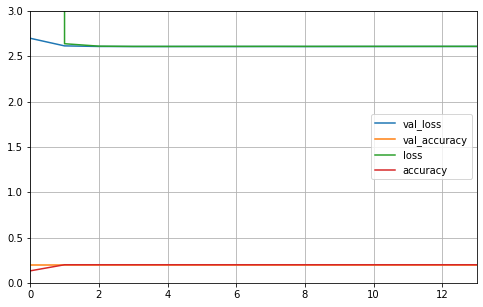

In [28]:
#Plotting loss
pd.DataFrame(history_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

In [29]:
#computing the accuracy matrix
from sklearn.metrics import classification_report

y_pred = modelvgg.predict(X_test, batch_size=64, verbose=1)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

361/361 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.20      1.00      0.33        72
          15       0.00      0.00      0.00         2
          16       0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is expected to get poor results as we just replaced the softmax layer of the original VGGNET with another layer and trained so we will have some modification by make the other layers untrainable first for some epochs and remove one fully connected layer as well

In [30]:
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet',
                               include_top=False,input_shape=(224, 224, 3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(n_classes, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
VGGmodel = Model(input=vgg_model.input, output=x)

# Pre-trained bottom layers are not trainable
for layer in VGGmodel.layers[:7]:
    layer.trainable = False

#Compliling and fitting
adam=keras.optimizers.Adam(learning_rate=0.2)
VGGmodel.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
history = VGGmodel.fit(X_train, y_train, epochs=4, validation_data=(X_valid, y_valid))

58892288/58889256 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 14424 samples, validate on 3246 samples
Epoch 1/4
14424/14424 [==============================] - 27s 2ms/step - loss: 953294.3212 - accuracy: 0.1887 - val_loss: 2.6353 - val_accuracy: 0.1993
Epoch 2/4
14424/14424 [==============================] - 27s 2ms/step - loss: 2.6393 - accuracy: 0.1942 - val_loss: 2.6474 - val_accuracy: 0.1993
Epoch 3/4
14424/14424 [==============================] - 27s 2ms/step - loss: 2.6405 - accuracy: 0.1907 - val_loss: 2.6446 - val_accuracy: 0.1993
Epoch 4/4
14424/14424 [==============================] - 27s 2ms/step - loss: 2.6384 - accuracy: 0.1933 - val_loss: 2.6278 - val_accuracy: 0.1993


In [31]:
# Pre-trained bottom layers are now trainable
for layer in VGGmodel.layers[:7]:
    layer.trainable = True

#Compiling
adam=keras.optimizers.Adam(learning_rate=0.1)
VGGmodel.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Early stopping:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fit the Model:
start_time = time.time()
history_vgg = VGGmodel.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 14424 samples, validate on 3246 samples
Epoch 1/30
14424/14424 [==============================] - 61s 4ms/step - loss: 2.6239 - accuracy: 0.1964 - val_loss: 2.6231 - val_accuracy: 0.1993
Epoch 2/30
14424/14424 [==============================] - 61s 4ms/step - loss: 2.6250 - accuracy: 0.1961 - val_loss: 2.6144 - val_accuracy: 0.1993
Epoch 3/30
14424/14424 [==============================] - 60s 4ms/step - loss: 2.6262 - accuracy: 0.1990 - val_loss: 2.6177 - val_accuracy: 0.1993
Epoch 4/30
14424/14424 [==============================] - 60s 4ms/step - loss: 2.6237 - accuracy: 0.1979 - val_loss: 2.6174 - val_accuracy: 0.1993
Epoch 5/30
14424/14424 [==============================] - 60s 4ms/step - loss: 2.6250 - accuracy: 0.1961 - val_loss: 2.6121 - val_accuracy: 0.1993
Epoch 6/30
14424/14424 [==============================] - 60s 4ms/step - loss: 2.6261 - accuracy: 0.1979 - val_loss: 2.6252 - val_accuracy: 0.1993
Epoch 7/30
14424/14424 [==============================] - 60s 4ms/ste

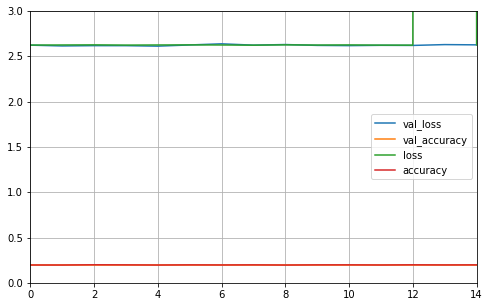

In [32]:
pd.DataFrame(history_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # set the vertical range to [0-1]
plt.show()

In [33]:
#computing the accuracy matrix
from sklearn.metrics import classification_report

y_pred = VGGmodel.predict(X_test, batch_size=64, verbose=1)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

361/361 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.20      1.00      0.33        72
          15       0.00      0.00      0.00         2
          16       0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building CNN from Scratch

In [98]:
from functools import partial
#defining default arguments
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=2, activation='relu', padding="SAME")
#build CNN model
model_CNN_relu = keras.models.Sequential([
    DefaultConv2D(filters=25, input_shape=[224, 224, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=16),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=32),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=512),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(n_classes, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

adam=keras.optimizers.Adam(learning_rate=0.1)
model_CNN_relu.compile(loss="categorical_crossentropy", optimizer=adam)

start_time = time.time()
history_CNN_relu = model_CNN_relu.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 14424 samples, validate on 3246 samples
Epoch 1/50
14424/14424 [==============================] - 16s 1ms/step - loss: 630244.4845 - val_loss: 2.6202
Epoch 2/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6204 - val_loss: 2.6255
Epoch 3/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6234 - val_loss: 2.6156
Epoch 4/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6231 - val_loss: 2.6207
Epoch 5/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6233 - val_loss: 2.6281
Epoch 6/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6237 - val_loss: 2.6286
Epoch 7/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6245 - val_loss: 2.6318
Epoch 8/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6232 - val_loss: 2.6230
Epoch 9/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6240 - val_loss: 2.6255
E

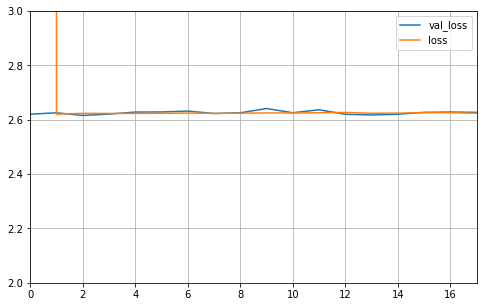

In [99]:
pd.DataFrame(history_CNN_relu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(2, 3) # set the vertical range to [0-1]
plt.show()

In [103]:
#Getting F1 score
y_pred = model_CNN_relu.predict(X_test, batch_size=64, verbose=1)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

361/361 [==============================] - 0s 642us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.20      1.00      0.33        72
          15       0.00      0.00      0.00         2
          16       0.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For this built in CNN the loss is still somehow high and it changes very slowly till early stopping ends the training although learning rate is chosed to be 0.1 so let's build less deeper model.

In [100]:
model_Less = keras.models.Sequential([
keras.layers.Conv2D(filters=25, kernel_size=2, input_shape=[224, 224, 3],activation='relu'),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Conv2D(filters=50, kernel_size=2,activation='relu'),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Conv2D(filters=100, kernel_size=2,activation='relu'),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(20, activation='softmax'),
])
model_Less.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 223, 223, 25)      325       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 111, 111, 25)      0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 110, 110, 50)      5050      
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 55, 55, 50)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 54, 54, 100)       20100     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 27, 27, 100)       0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 72900)           

In [101]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

adam=keras.optimizers.Adam(learning_rate=0.1)
model_Less.compile(loss="categorical_crossentropy", optimizer=adam)

start_time = time.time()
history = model_Less.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 14424 samples, validate on 3246 samples
Epoch 1/50
14424/14424 [==============================] - 16s 1ms/step - loss: 5033.0056 - val_loss: 2.6180
Epoch 2/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6231 - val_loss: 2.6216
Epoch 3/50
14424/14424 [==============================] - 16s 1ms/step - loss: 2.6254 - val_loss: 2.6234
Epoch 4/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6256 - val_loss: 2.6230
Epoch 5/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6251 - val_loss: 2.6153
Epoch 6/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6236 - val_loss: 2.6156
Epoch 7/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6235 - val_loss: 2.6238
Epoch 8/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6245 - val_loss: 2.6144
Epoch 9/50
14424/14424 [==============================] - 17s 1ms/step - loss: 2.6237 - val_loss: 2.6170
Epo

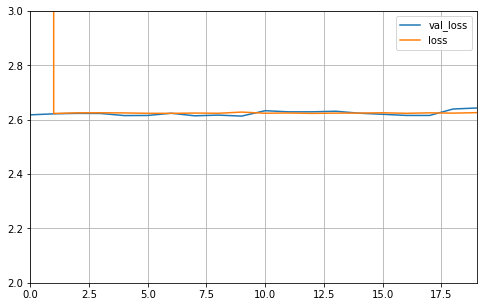

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(2, 3) # set the vertical range to [0-1]
plt.show()

In [105]:
#Getting F1 score
y_pred = model_Less.predict(X_test, batch_size=64, verbose=1)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

361/361 [==============================] - 0s 571us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         2
          14       0.20      1.00      0.33        72
          15       0.00      0.00      0.00         2
          16       0.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

From the above results we can see that VGG model,built from scratch CNN almost gave the same results

# Using Xception Pretrained Model

In [37]:
#Building the model
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model_Xception = keras.models.Model(inputs=base_model.input, outputs=output)

#Displaying the layers
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

83689472/83683744 [==============================] - 2s 0us/step
0 input_3
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_9
13 block2_pool
14 batch_normalization_1
15 add_1
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_10
23 block3_pool
24 batch_normalization_2
25 add_2
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_11
33 block4_pool
34 batch_normalization_3
35 add_3
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_4
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sep

In [38]:
#First pre-trained bottom layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

#Compliling and fitting
adam=keras.optimizers.Adam(learning_rate=0.2)
model_Xception.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model_Xception.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Train on 14424 samples, validate on 3246 samples
Epoch 1/5
14424/14424 [==============================] - 66s 5ms/step - loss: 26.6449 - accuracy: 0.0930 - val_loss: 1087.4828 - val_accuracy: 0.0311
Epoch 2/5
14424/14424 [==============================] - 63s 4ms/step - loss: 25.2066 - accuracy: 0.1243 - val_loss: 965.2070 - val_accuracy: 0.0487
Epoch 3/5
14424/14424 [==============================] - 63s 4ms/step - loss: 23.7955 - accuracy: 0.1405 - val_loss: 1124.1959 - val_accuracy: 0.0539
Epoch 4/5
14424/14424 [==============================] - 63s 4ms/step - loss: 26.2466 - accuracy: 0.1482 - val_loss: 2100.1967 - val_accuracy: 0.0527
Epoch 5/5
14424/14424 [==============================] - 63s 4ms/step - loss: 25.4760 - accuracy: 0.1640 - val_loss: 2054.9449 - val_accuracy: 0.0471


In [39]:
# Pre-trained bottom layers are now trainable
for layer in base_model.layers:
    layer.trainable = False

#Compiling
adam=keras.optimizers.Adam(learning_rate=0.01)
model_Xception.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

# Early stopping:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fit the Model:
start_time = time.time()
history_Xception = model_Xception.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 14424 samples, validate on 3246 samples
Epoch 1/30
14424/14424 [==============================] - 65s 4ms/step - loss: 12.5596 - accuracy: 0.2601 - val_loss: 1865.1707 - val_accuracy: 0.0410
Epoch 2/30
14424/14424 [==============================] - 63s 4ms/step - loss: 9.6175 - accuracy: 0.2971 - val_loss: 1898.0554 - val_accuracy: 0.0416
Epoch 3/30
14424/14424 [==============================] - 63s 4ms/step - loss: 8.4464 - accuracy: 0.3066 - val_loss: 1939.4490 - val_accuracy: 0.0425
Epoch 4/30
14424/14424 [==============================] - 63s 4ms/step - loss: 7.7579 - accuracy: 0.3157 - val_loss: 1952.5794 - val_accuracy: 0.0441
Epoch 5/30
14424/14424 [==============================] - 63s 4ms/step - loss: 7.2679 - accuracy: 0.3264 - val_loss: 1877.4798 - val_accuracy: 0.0400
Epoch 6/30
14424/14424 [==============================] - 63s 4ms/step - loss: 6.7995 - accuracy: 0.3299 - val_loss: 1943.1268 - val_accuracy: 0.0425
Epoch 7/30
14424/14424 [==========================

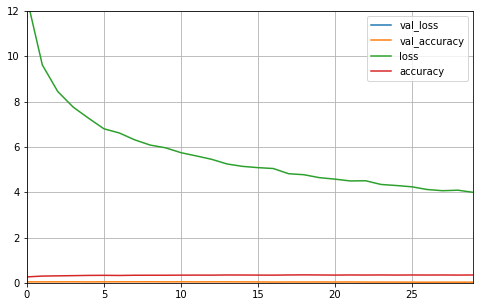

In [45]:
#Drawing loss and accuracy and obviuos overfitting can be seen because validation loss is much higher than training loss
pd.DataFrame(history_Xception.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 12) # set the vertical range to [0-1]
plt.show()

Severe overfitting witnessed when we removed just the top layers and this expected as Xception network is very deep and amount of data is not enough so we can say that modelvgg is better than all but it just slightly better than built from scratch CNN 